```python
import numpy as np
import matplotlib.pyplot as plt

def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])
plt.savefig('images/phase-portrait.png')
```

In [1]:
# https://github.com/JuliaLang/julia/blob/master/examples/ndgrid.jl#L31-50
module MeshGrid

export meshgrid


meshgrid(v::AbstractVector) = meshgrid(v, v)

function meshgrid{T}(vx::AbstractVector{T}, vy::AbstractVector{T})
    m, n = length(vy), length(vx)
    vx = reshape(vx, 1, n)
    vy = reshape(vy, m, 1)
    (repmat(vx, m, 1), repmat(vy, 1, n))
end

function meshgrid{T}(vx::AbstractVector{T}, vy::AbstractVector{T},
                     vz::AbstractVector{T})
    m, n, o = length(vy), length(vx), length(vz)
    vx = reshape(vx, 1, n, 1)
    vy = reshape(vy, m, 1, 1)
    vz = reshape(vz, 1, 1, o)
    om = ones(Int, m)
    on = ones(Int, n)
    oo = ones(Int, o)
    (vx[om, :, oo], vy[:, on, oo], vz[om, on, :])
end


end

INFO: Loading help data...


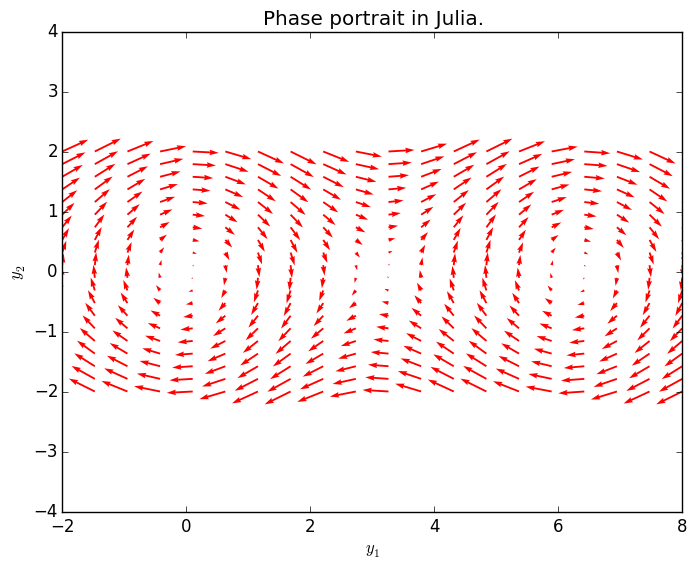

In [2]:
using PyPlot
using MeshGrid

function f(Y,t)
    y1, y2 = Y
    return [y2, -sin(y1)]
end
 
y1 = linspace(-2.0, 8.0, 20);
y2 = linspace(-2.0, 2.0, 20);

Y1, Y2 = meshgrid(y1, y2)

t = 0
 

u, v = zeros(size(Y1)), zeros(size(Y2))

NI, NJ = size(Y1)

for i in 1:NI
    for j in 1:NJ
        x = Y1[i, j]
        y = Y2[i, j]
        y′ = f([x, y], t)
        u[i,j] = y′[1]
        v[i,j] = y′[2]
    end
end


Q = quiver(Y1, Y2, u, v, color="r") 

title("Phase portrait in Julia.")
xlabel(L"$y_1$")
ylabel(L"$y_2$")
xlim([-2, 8])
ylim([-4, 4])
savefig("phase-portrait.png")

In [5]:
using PyCall

In [10]:
@pyimport scipy.integrate as integrate

In [11]:
integrate.ode

fn (generic function with 1 method)